In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('train.csv')

In [5]:
data.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [7]:
data.shape

(2016, 8)

In [9]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20) 

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64
********************
baths
2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: count, dtype: int64
********************
size
2080.0    12
1440.0    11
1460.0    11
1370.0    11
1670.0    11
          ..
1548.0     1
1174.0     1
1865.0     1
578.0      1
795.0      1
Name: count, Length: 879, dtype: int64
********************
size_units
sqft    2016
Name: count, dtype: int64
********************
lot_size
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: count, Length: 959, dtype: int64
********************
lot_size_units
sqft    1449
acre     220
Name: count, dtype: int64
********************
zip_code
98115    170
98103   

In [11]:
data.isna().sum

<bound method DataFrame.sum of        beds  baths   size  size_units  lot_size  lot_size_units  zip_code  \
0     False  False  False       False     False           False     False   
1     False  False  False       False     False           False     False   
2     False  False  False       False     False           False     False   
3     False  False  False       False     False           False     False   
4     False  False  False       False      True            True     False   
...     ...    ...    ...         ...       ...             ...       ...   
2011  False  False  False       False     False           False     False   
2012  False  False  False       False      True            True     False   
2013  False  False  False       False     False           False     False   
2014  False  False  False       False      True            True     False   
2015  False  False  False       False     False           False     False   

      price  
0     False  
1     False  
2 

In [13]:
data.drop(columns=['lot_size','lot_size_units'],inplace=True)

In [15]:
data.describe()

,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   beds        2016 non-null   int64  
 1   baths       2016 non-null   float64
 2   size        2016 non-null   float64
 3   size_units  2016 non-null   object 
 4   zip_code    2016 non-null   int64  
 5   price       2016 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 94.6+ KB


In [19]:
data['beds'].value_counts()

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64

In [21]:
data.head()

,beds,baths,size,size_units,zip_code,price
0,3,2.5,2590.0,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,98106,915000.0
2,4,3.0,2040.0,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,98102,950000.0


In [23]:
data['price_per_sqft'] = data['price'] * 100000 / data['size']

In [25]:
data['price_per_sqft']

0       3.069498e+07
1       4.084821e+07
2       4.656863e+07
3       5.131579e+07
4       9.117083e+07
            ...     
2011    6.642336e+07
2012    6.186727e+07
2013    5.373832e+07
2014    7.421384e+07
2015    3.853801e+07
Name: price_per_sqft, Length: 2016, dtype: float64

In [27]:
data.describe()

,beds,baths,size,zip_code,price,price_per_sqft
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05,5.915851e+07
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05,8.327952e+07
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05,6.796117e+06
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05,4.452221e+07
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05,5.529762e+07
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06,6.595389e+07
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07,3.424658e+09


In [29]:
data.shape

(2016, 7)

In [31]:
data

,beds,baths,size,size_units,zip_code,price,price_per_sqft
0,3,2.5,2590.0,sqft,98144,795000.0,3.069498e+07
1,4,2.0,2240.0,sqft,98106,915000.0,4.084821e+07
2,4,3.0,2040.0,sqft,98107,950000.0,4.656863e+07
3,4,3.0,3800.0,sqft,98199,1950000.0,5.131579e+07
4,2,2.0,1042.0,sqft,98102,950000.0,9.117083e+07
...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,98112,910000.0,6.642336e+07
2012,1,1.0,889.0,sqft,98121,550000.0,6.186727e+07
2013,4,2.0,2140.0,sqft,98199,1150000.0,5.373832e+07
2014,2,2.0,795.0,sqft,98103,590000.0,7.421384e+07


In [33]:
data.drop(columns=['size_units'],inplace=True)

In [35]:
data.drop(columns=['price_per_sqft'],inplace=True)

In [37]:
data.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [43]:
data.to_csv("final_dataset.csv")

In [45]:
X=data.drop(columns=['price'])
y=data['price']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
print(X_train.shape)
print(y_train.shape)

(1612, 4)
(1612,)


In [61]:
train_data = X_train.join(y_train)

In [63]:
train_data

,beds,baths,size,zip_code,price
1354,3,3.5,1644.0,98112,820000.0
942,2,1.0,2060.0,98106,525000.0
1170,1,1.0,513.0,98121,315000.0
651,2,2.0,1644.0,98101,2250000.0
360,3,3.5,1968.0,98199,980000.0
...,...,...,...,...,...
835,3,2.0,1650.0,98126,750000.0
1216,1,1.0,718.0,98119,459000.0
1653,2,1.0,1760.0,98126,550000.0
559,2,2.5,1460.0,98106,599950.0


array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

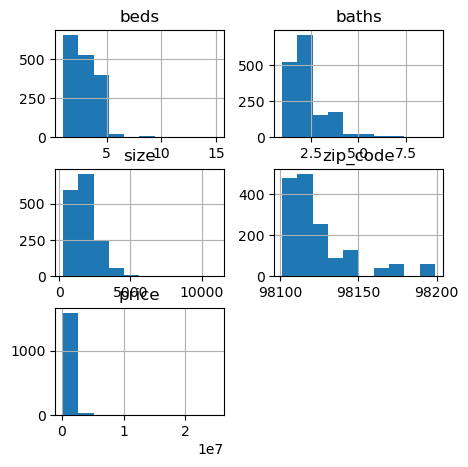

In [65]:
train_data.hist(figsize=(5,5))

In [67]:
train_data.corr()

,beds,baths,size,zip_code,price
beds,1.000000,0.651934,0.771737,0.079799,0.268405
baths,0.651934,1.000000,0.669049,0.006380,0.285259
size,0.771737,0.669049,1.000000,0.070931,0.408968
zip_code,0.079799,0.006380,0.070931,1.000000,-0.051615
price,0.268405,0.285259,0.408968,-0.051615,1.000000


<Axes: >

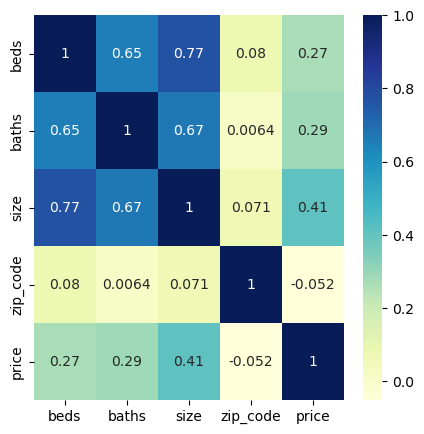

In [69]:
plt.figure(figsize=(5,5))
sns.heatmap(train_data.corr(),annot=True, cmap="YlGnBu")

In [71]:
train_data['beds'] = np.log(train_data['beds']+ 1)
train_data['baths'] = np.log(train_data['baths']+ 1)

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'zip_code'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

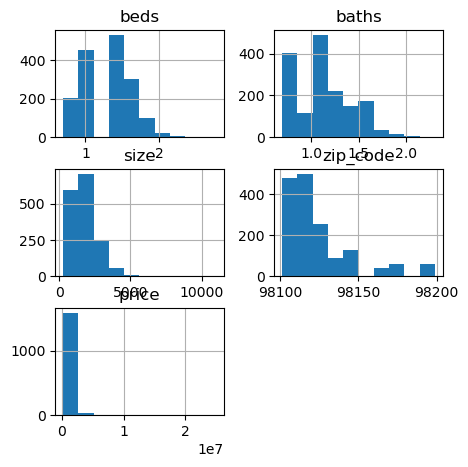

In [73]:
train_data.hist(figsize=(5,5))

# Applying linear regression

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [84]:
lr.coef_

array([-102136.16862495,   46329.76976851,     520.38883921,
         -3348.98074859])

In [86]:
lr.intercept_

328867480.03583443

In [92]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False),['beds']),remainder='passthrough')

In [94]:
 scaler = StandardScaler()

In [96]:
lr = LinearRegression()


In [98]:
pipe = make_pipeline(column_trans, scaler, lr)

In [100]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [102]:
y_pred_lr = pipe.predict(X_test)

In [104]:
r2_score(y_test,y_pred_lr)

0.5743461632174616

# usimng lasso

In [109]:
lasso =Lasso()

In [111]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [113]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [115]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.5746817917322382

# using Ridge


In [126]:
ridge = Ridge()

In [128]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [130]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['beds'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [132]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.5746884627878555

In [134]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.5743461632174616
Lasso:  0.5746817917322382
Ridge:  0.5746884627878555


In [136]:
import pickle

In [138]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))